# 1일차 Review : 같은 문제 다시 풀어보기
---
- 학습은 10번만!

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
california = fetch_california_housing()

In [4]:
x = california.data
y = california.target

In [5]:
x.shape, y.shape

((20640, 8), (20640,))

In [6]:
import pandas as pd

In [7]:
pd.DataFrame(x, columns=california.feature_names).head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


In [8]:
pd.DataFrame(y, columns=california.target_names).head(3)

,MedHouseVal
0,4.526
1,3.585
2,3.521


In [9]:
#####################
# 라이브러리 불러오기
#####################
import tensorflow
from tensorflow import keras

import numpy as np
import pandas as pd


In [10]:
########
# 모델링: Sequential API
########
# 1. 세션 종료
keras.backend.clear_session()

# 2. 모델 선언
model = keras.models.Sequential()

# 3. 모델 블록 조립
model.add(keras.layers.Input(shape = (8, )))
model.add(keras.layers.Dense(1))

# 4. 컴파일
model.compile(loss = 'mse', optimizer = 'adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [11]:
###########
# 모델 학습
###########
model.fit(x, y, epochs= 10, verbose= 1)

Epoch 1/10
645/645 [==============================] - 1s 985us/step - loss: 18255.2344
Epoch 2/10
645/645 [==============================] - 1s 903us/step - loss: 1209.4286
Epoch 3/10
645/645 [==============================] - 1s 899us/step - loss: 243.2110
Epoch 4/10
645/645 [==============================] - 1s 854us/step - loss: 85.6576
Epoch 5/10
645/645 [==============================] - 1s 829us/step - loss: 60.0768
Epoch 6/10
645/645 [==============================] - 1s 897us/step - loss: 42.3511
Epoch 7/10
645/645 [==============================] - 1s 820us/step - loss: 27.1925
Epoch 8/10
645/645 [==============================] - 1s 907us/step - loss: 15.7488
Epoch 9/10
645/645 [==============================] - 1s 871us/step - loss: 8.6822
Epoch 10/10
645/645 [==============================] - 1s 935us/step - loss: 4.9929


In [12]:
###########
# 모델 예측
###########
print(y)
print(model.predict(x))

[4.526 3.585 3.521 ... 0.923 0.847 0.894]
645/645 [==============================] - 1s 872us/step
[[0.27703437]
 [0.9624325 ]
 [0.09791788]
 ...
 [4.3536267 ]
 [4.26809   ]
 [4.0303416 ]]


In [13]:
result = pd.DataFrame()
result['y'] = y
result['y_pred'] = model.predict(x)
result

645/645 [==============================] - 1s 1ms/step


,y,y_pred
0,4.526,0.277034
1,3.585,0.962433
2,3.521,0.097918
3,3.413,0.656839
4,3.422,1.397829
...,...,...
20635,0.781,4.005665
20636,0.771,4.053111
20637,0.923,4.353627
20638,0.847,4.268090


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

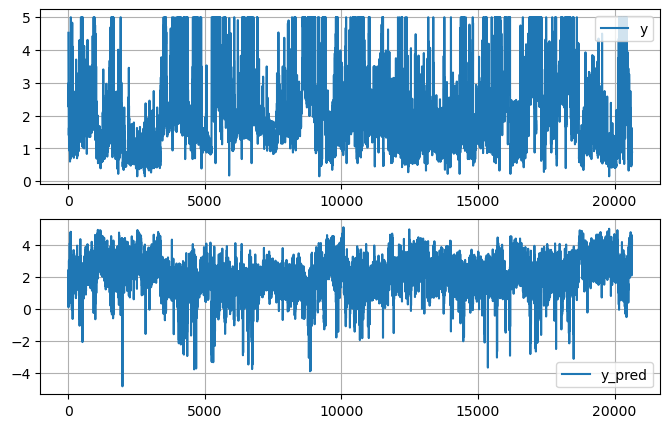

In [15]:
plt.figure(figsize = (8, 5))
plt.subplot(2, 1, 1)
plt.plot(range(20640), result['y'], label = 'y')
plt.legend()
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(range(20640), result['y_pred'], label = 'y_pred')
plt.legend()
plt.grid()
plt.show()

In [16]:
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# y_pred = model.predict(x)
# print('MAE: ', mean_absolute_error(y, y_pred))
# print('MSE: ', mean_squared_error(y, y_pred))
# print('R2: ', r2_score(y, y_pred))

# 히든 레이어 추가하여 모델링!
---
- 조건
    - 히든 레이어 2개를 추가하여 다시 모델링!
    - 히든 레이어 노드 수 : 32
    - 히든 레이어 activation = 'relu'

In [17]:
x.shape, y.shape

((20640, 8), (20640,))

In [27]:
########
# 모델링: ANN
########
# 1. 세션 종료
keras.backend.clear_session()

# 2. 모델 선언
model = keras.models.Sequential()

# 3. 모델 블록 조립
model.add(keras.layers.Input(shape= (8, )))
model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dense(1))

# 4. 컴파일
model.compile(loss = 'mse', optimizer= 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [28]:
###########
# 모델 학습
###########
model.fit(x, y, epochs= 10, verbose= 1)


Epoch 1/10
645/645 [==============================] - 1s 1ms/step - loss: 37.0550
Epoch 2/10
645/645 [==============================] - 1s 1ms/step - loss: 1.9120
Epoch 3/10
645/645 [==============================] - 1s 1ms/step - loss: 2.0181
Epoch 4/10
645/645 [==============================] - 1s 1ms/step - loss: 7.8152
Epoch 5/10
645/645 [==============================] - 1s 1ms/step - loss: 1.5972
Epoch 6/10
645/645 [==============================] - 1s 1ms/step - loss: 1.8331
Epoch 7/10
645/645 [==============================] - 1s 1ms/step - loss: 6.0659
Epoch 8/10
645/645 [==============================] - 1s 1ms/step - loss: 1.2920
Epoch 9/10
645/645 [==============================] - 1s 1ms/step - loss: 2.3828
Epoch 10/10
645/645 [==============================] - 1s 1ms/step - loss: 1.1081


In [29]:
###########
# 모델 예측
###########
result['y_hidden'] = model.predict(x)
result


645/645 [==============================] - 1s 934us/step


,y,y_pred,y_hidden
0,4.526,0.277034,3.894468
1,3.585,0.962433,3.809811
2,3.521,0.097918,4.384371
3,3.413,0.656839,3.244797
4,3.422,1.397829,2.321766
...,...,...,...
20635,0.781,4.005665,0.907633
20636,0.771,4.053111,1.406469
20637,0.923,4.353627,0.810456
20638,0.847,4.268090,0.898266


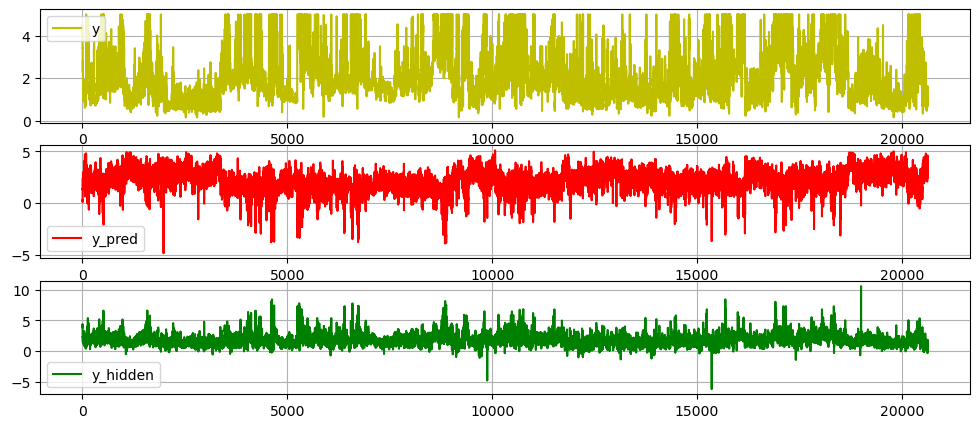

In [30]:
plt.figure(figsize = (12, 5))
plt.subplot(3, 1, 1)
plt.plot(range(20640), result['y'], label = 'y', color = 'y')
plt.legend()
plt.grid()
plt.subplot(3, 1, 2)
plt.plot(range(20640), result['y_pred'], label = 'y_pred', color = 'r')
plt.legend()
plt.grid()
plt.subplot(3, 1, 3)
plt.plot(range(20640), result['y_hidden'], label = 'y_hidden', color = 'g')
plt.legend()
plt.grid()
plt.show()